In [1]:

# coding: utf-8

# In[1]:

from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')



In [2]:
## Weather data

weather_headers = ['date',
                   'max_temp','mean_temp','min_temp',
                   'max_dp','mean_dp','min_dp',
                   'max_hum','mean_hum','min_hum',
                   'max_sea','mean_sea','min_sea',
                   'max_vis','mean_vis','min_vis',
                   'max_wind','mean_wind','max_gust',
                   'rain_inches','cloud_cover','events',
                   'wind_dir_degrees','ZIP']
seasons_dict = {1: 'Winter',2: 'Spring',3: 'Spring',4: 'Spring',5: 'Summer',6: 'Summer',
                7: 'Summer',8: 'Autumn',9: 'Autumn',10: 'Autumn',11: 'Winter',12: 'Winter'}

raw_data_w1 = pd.read_csv('201402_weather_data.csv', parse_dates=['Date'])
raw_data_w1.columns = weather_headers
raw_data_w2 = pd.read_csv('201408_weather_data.csv', parse_dates=['PDT'])
raw_data_w2.columns = weather_headers
raw_data_w3 = pd.read_csv('201508_weather_data.csv', parse_dates=['PDT'])
raw_data_w3.columns = weather_headers

weather = pd.concat([raw_data_w1, raw_data_w2, raw_data_w3])
weather.index = weather['date']

weather['season'] = weather['date'].dt.month.map(seasons_dict)



In [5]:
weather.head()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,min_vis,max_wind,mean_wind,max_gust,rain_inches,cloud_cover,events,wind_dir_degrees,ZIP,season
date,,,,,,,,,,,,,,,,,,,,,
2013-08-29,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,Autumn
2013-08-30,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,Autumn
2013-08-31,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,Autumn
2013-09-01,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,Autumn
2013-09-02,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,Autumn


In [6]:
### Trip data
trip_headers = ['trip_id','trip_time',
                'start_dt','start_station','start_terminal',
                'end_dt','end_station','end_terminal',
                'bike_num','user_type','ZIP']

raw_data_1 = pd.read_csv('201402_trip_data.csv', parse_dates=True)
raw_data_1.columns = trip_headers
raw_data_2 = pd.read_csv('201408_trip_data.csv', parse_dates=True)
raw_data_2.columns = trip_headers
raw_data_3 = pd.read_csv('201508_trip_data.csv', parse_dates=True)
raw_data_3.columns = trip_headers

trip_data = pd.concat([raw_data_1, raw_data_2, raw_data_3])

trip_data.index = trip_data['trip_id'].astype(int)
trip_data.drop('trip_id', axis=1, inplace=True)

In [8]:
trip_data.head()

,trip_time,start_dt,start_station,start_terminal,end_dt,end_station,end_terminal,bike_num,user_type,ZIP
trip_id,,,,,,,,,,
4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [9]:
## Station data
station_headers = ['station_id','station_name','lat','long',
                   'dock_count','city','install_date']

raw_data_1 = pd.read_csv('201402_station_data.csv')
raw_data_1.columns = station_headers
raw_data_1.index = raw_data_1['station_id']
raw_data_2 = pd.read_csv('201408_station_data.csv')
raw_data_2.columns = station_headers
raw_data_2.index = raw_data_2['station_id']
raw_data_3 = pd.read_csv('201508_station_data.csv')
raw_data_3.columns = station_headers
raw_data_3.index = raw_data_3['station_id']

station_data = raw_data_3.merge((raw_data_1.merge(raw_data_2, on='station_id', how='outer', suffixes=('_201402','_201408'))),
                                 on='station_id', how='outer')
station_data.index = station_data['station_id']

In [10]:
station_data.head()

,station_id,station_name,lat,long,dock_count,city,install_date,station_name_201402,lat_201402,long_201402,dock_count_201402,city_201402,install_date_201402,station_name_201408,lat_201408,long_201408,dock_count_201408,city_201408,install_date_201408
station_id,,,,,,,,,,,,,,,,,,,
2,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,San Jose Diridon Caltrain Station,37.329732,-121.901782,27.0,San Jose,8/6/2013,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
3,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,San Jose Civic Center,37.330698,-121.888979,15.0,San Jose,8/5/2013,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
4,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,Santa Clara at Almaden,37.333988,-121.894902,11.0,San Jose,8/6/2013,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
5,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,Adobe on Almaden,37.331415,-121.893200,19.0,San Jose,8/5/2013,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
6,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,San Pedro Square,37.336721,-121.894074,15.0,San Jose,8/7/2013,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


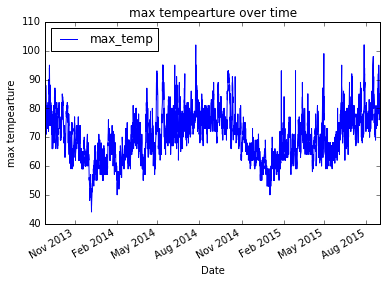

In [11]:
weather.plot(x='date', y='max_temp')
plt.title("max tempearture over time")
plt.xlabel("Date")
plt.ylabel("max tempearture")